---
title: T-SNE
format: html
bibliography: project_reference.bib
---

## What is TSNE?

T-distributed Stochastic Neighbor Embedding is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. The objective of t-sne is to visualize compex datasets in high dimensional space.

T-sne finds the similarity measures between pairs of instances in higher and lower dimensional space. Then, it tries to optimize two similarity measures.[@noauthor_introduction_nodate]

T-sne is used for things such as clustering and classification (see clustering tab), anomoly detection, NLP, computer security and cancer research. 

To learn more about T-sne visit this website [here!](https://www.datacamp.com/tutorial/introduction-t-sne)

## Applying TSNE to data

### Importing Libraries 

In [2]:
#| code-fold: true
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

### Importing Data

In [18]:
#| code-fold: true
tsne = pd.read_csv("/Users/kendallgilbert/dsan-5000-project-kendallgilbert180/dsan-website/5000-website/data/01-modified-data/nb_record.csv")
label_encoder = LabelEncoder()
tsne['Country'] = label_encoder.fit_transform(tsne['Country'])

### Implementing TSNE

In [19]:
#| code-fold: true
X = tsne.drop('Country', axis=1)
y = tsne['Country']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for comparison
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### TSNE with three different perplexities: 5, 30, 40

**Perplexity: 5**

Using t-sne, the scatter plots below shows points that are closer together in the high dimensional space (7 variables) by showing how they are close together in a two dimensional space. Perplexity is essentially states how much the model should balance attention between global and local structures. The perplexity is at 5. These means that local variations dominate. Data points that are close to eachother in the high-dimensional space are represented as close neighbors in the 2D space. 

The ideal perplexity for every data set is different. 

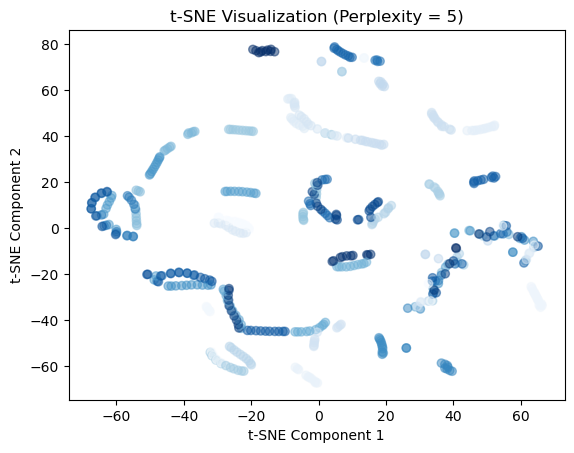

RESULTS
shape :  (516, 2)
First few points : 
 [[50.199814 -5.543903]
 [63.88931  -8.412262]]


In [20]:
#| code-fold: true
# Perplexity - 5
tsne_result_5 = TSNE(n_components=2, random_state=1000, perplexity=5, n_iter=1000).fit_transform(X_scaled)
plt.scatter(tsne_result_5[:, 0], tsne_result_5[:, 1], c=tsne['Country'], cmap='Blues', alpha=0.5)
plt.title('t-SNE Visualization (Perplexity = 5)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Results
print("RESULTS") 
print("shape : ",tsne_result_5.shape)
print("First few points : \n",tsne_result_5[0:2,:])

**Perplexity: 30**

Within the scatter plot below, the perplexity is 30. Having a perplexity of 30 puts more emphasis on the global structure. The algorithm considers a larger number of nearest neighbors for each point.

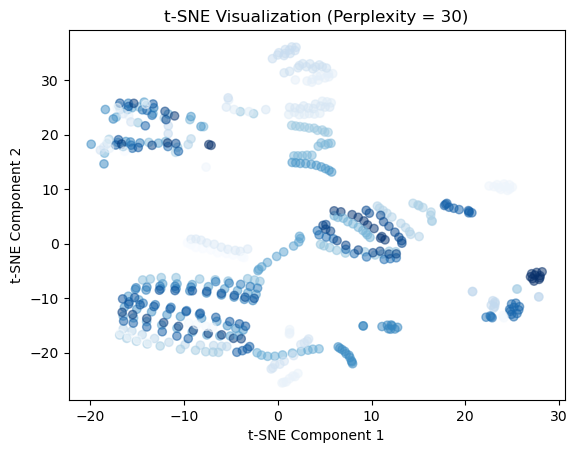

RESULTS
shape :  (516, 2)
First few points : 
 [[-11.677515  21.619915]
 [-16.819391  24.590347]]


In [21]:
#| code-fold: true
# Perplexity - 30
tsne_result_30 = TSNE(n_components=2, random_state=1000, perplexity=30, n_iter=1000).fit_transform(X_scaled)
plt.scatter(tsne_result_30[:, 0], tsne_result_30[:, 1], c=tsne['Country'], cmap='Blues', alpha=0.5)
plt.title('t-SNE Visualization (Perplexity = 30)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Results
print("RESULTS") 
print("shape : ",tsne_result_30.shape)
print("First few points : \n",tsne_result_30[0:2,:])

**Perplexity: 40**
Within the scatter plot below the perplexity is 40. This means that the algorithm focuses on global structure even more. 

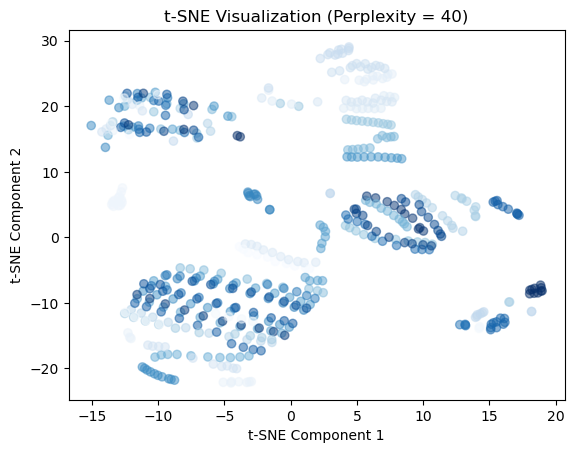

RESULTS
shape :  (516, 2)
First few points : 
 [[ -7.744476  18.761927]
 [-12.337536  20.984404]]


In [22]:
#| code-fold: true
# Perplexity - 40
tsne_result_40 = TSNE(n_components=2, random_state=1000, perplexity=40, n_iter=1000).fit_transform(X_scaled)
plt.scatter(tsne_result_40[:, 0], tsne_result_40[:, 1], c=tsne['Country'], cmap='Blues', alpha=0.5)
plt.title('t-SNE Visualization (Perplexity = 40)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Results
print("RESULTS") 
print("shape : ",tsne_result_40.shape)
print("First few points : \n",tsne_result_40[0:2,:])

Perplexity of 40 gives us a good idea of the datas global structure. I think it is more beneficial than the scatter plots created with perplexities of 5 and 30.

## Fidings / Conclusion 

Dots that are closer together represent countries that are close together in a high dimensional space. Because points form clusters / groups it can be inferred that there are patterns in the high dimensional data. 

It's important to note that the interpretation of a t-SNE plot is **qualitative** not quantitative. The distances between points within the t-sne plots above do not have a meaningful scale, the goal is to visualize the inherent structures and relationships in the data since that is unavailable in the 7 dimensional space. 

### Compare with PCA

I provided the PCA scatter plot below to illustrate the differences between the two plots. I think that both t-sne and pca have beneficial results. T-sne shows that some countries stay close to eachother in a seven dimension space and some do not. PCA tells us that there are some rows within the seven dimensional space that are extreme outliers. This make sense as PCA tends to capture global trends. 

Text(0.5, 1.0, 'PCA')

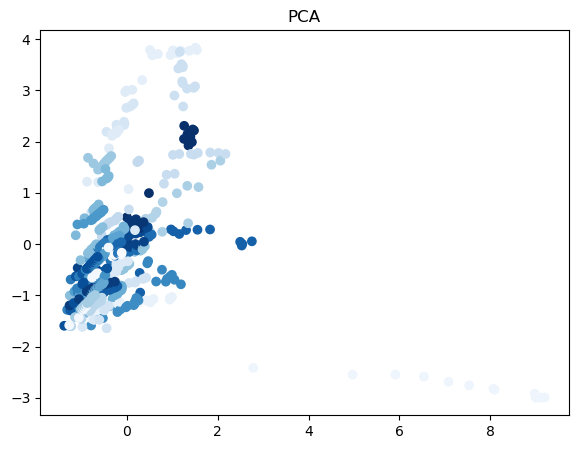

In [23]:
#| code-fold: true
# Plot PCA results
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Blues')
plt.title('PCA')
